In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 983
0.0
f_best: 0.0
τ = 5.7510e-04
Iteration 1: τ = 5.7510e-04, Δα = 2.8284e+01
694730.8671087925
f_best: 0.0
τ = 3.3666e-07
Iteration 2: τ = 3.3666e-07, Δα = 2.2725e+01
10175.605989279804
f_best: 0.0
τ = 1.7117e-07
Iteration 3: τ = 1.7117e-07, Δα = 1.0165e-03
10172.537376006896
f_best: 0.0
τ = 1.0176e-06
Iteration 4: τ = 1.0176e-06, Δα = 5.1671e-04
10170.977619308282
f_best: 0.0
τ = 2.9012e-05
Iteration 5: τ = 2.9012e-05, Δα = 3.0715e-03
10161.708256867258
f_best: 0.0
τ = 5.0425e-04
Iteration 6: τ = 5.0425e-04, Δα = 8.7053e-02
9901.06196292651
f_best: 0.0
τ = 1.8379e-04
Iteration 7: τ = 1.8379e-04, Δα = 1.3586e+00
6442.0071995439075
f_best: 0.0
τ = 9.7431e-07
Iteration 8: τ = 9.7431e-07, Δα = 3.7988e-01
5672.1213094352
f_best: 0.0
τ = 1.0660e-06
Iteration 9: τ = 1.0660e-06, Δα = 1.8741e-03
5668.51695842452
f_best: 0.0
τ = 2.4351e-06
Iteration 10: τ = 2.4351e-06, Δα = 2.0499e-03
5664.575878498375
f_best: 0.0
τ = 6.8794e-06
Iteration 11: τ = 6.8794e-06, Δα = 4.6808e-0

/Users/emiliehansenharklau/Documents/Optimering/optimization_project/svm.py:327: RuntimeWarning: divide by zero encountered in scalar divide
  s = 1 - r_min / r_max


τ = 6.5929e-06
Iteration 1540: τ = 6.5929e-06, Δα = 2.3484e-03
602.0118924921755
f_best: 0.0
τ = 6.5825e-06
Iteration 1541: τ = 6.5825e-06, Δα = 2.4392e-03
601.1098220958102
f_best: 0.0
τ = 6.3185e-06
Iteration 1542: τ = 6.3185e-06, Δα = 2.4335e-03
600.2105283394428
f_best: 0.0
τ = 6.0802e-06
Iteration 1543: τ = 6.0802e-06, Δα = 2.3341e-03
599.3485760066508
f_best: 0.0
τ = 6.0949e-06
Iteration 1544: τ = 6.0949e-06, Δα = 2.2445e-03
598.5203129185143
f_best: 0.0
τ = 6.3443e-06
Iteration 1545: τ = 6.3443e-06, Δα = 2.2484e-03
597.6911965501122
f_best: 0.0
τ = 6.5929e-06
Iteration 1546: τ = 6.5929e-06, Δα = 2.3387e-03
596.8293675457483
f_best: 0.0
τ = 6.5813e-06
Iteration 1547: τ = 6.5813e-06, Δα = 2.4286e-03
595.9350758948729
f_best: 0.0
τ = 6.3177e-06
Iteration 1548: τ = 6.3177e-06, Δα = 2.4225e-03
595.0436874047618
f_best: 0.0
τ = 6.0807e-06
Iteration 1549: τ = 6.0807e-06, Δα = 2.3238e-03
594.1892767348386
f_best: 0.0
τ = 6.0964e-06
Iteration 1550: τ = 6.0964e-06, Δα = 2.2350e-03
593.368

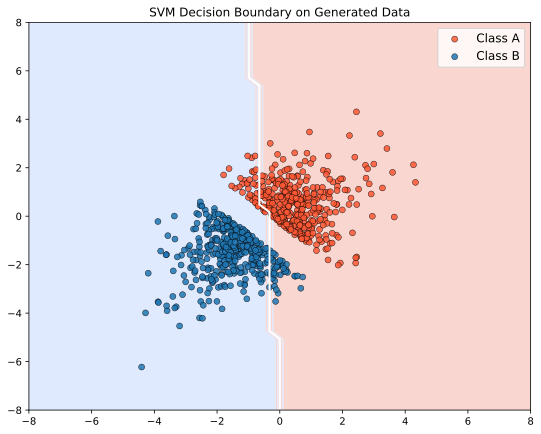

In [3]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 400
n_B = 400
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="linear", lr=0.01, mode="dual", sigma=1.5, s=1.0, max_iter=10000, tol=1e-6)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
print("Finished predict")

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, preds, alpha=0.4, colors=["#AFCBFF", "#F19C8A"])
plt.contour(xx, yy, preds, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()